In [1]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(style="ticks")

In [3]:
GTC_DATA_DIR = "/gws/nopw/j04/ai4er/users/pn341/earthquake-predictability/data/gtc_quakes_data"
LABQUAKES_DATA_DIR = f"{GTC_DATA_DIR}/synquakes"
GUALANDI_DATA_DIR = f"{LABQUAKES_DATA_DIR}/Gualandietal2023"

In [4]:
def read_file(file_path):
    with open(file_path, "r") as file:
        return file.readlines()

def get_gualandi_labquake(folder_path):
    gualandi_lq_files = glob(folder_path + "/*")
    gualandi_lq_filedict = {}
    data = {}
    
    for file in gualandi_lq_files:
        key = file.split("/")[-1].split(".")[0]
        gualandi_lq_filedict[key] = file
        if "sol_" not in key:
            data[key] = float(read_file(gualandi_lq_filedict[key])[0][:-1])
        if key == "sol_t":
            data[key] = pd.DataFrame([float(x[:-1]) for x in read_file(gualandi_lq_filedict["sol_t"])])
        if key == "sol_u":
            with open(gualandi_lq_filedict["sol_u"], "r") as file:
                data[key] = pd.read_csv(file, delimiter="\t", header=None)
    
    return data

In [5]:
i417_FOLDER_PATH = f"{GUALANDI_DATA_DIR}/i417"
i417_data = get_gualandi_labquake(i417_FOLDER_PATH)

In [6]:
i417_data

{'L1': 3e-06,
 'a': 0.01,
 'p': 0.1777706598334401,
 'sigman0': 24976000.0,
 'sol_t':                   0
 0          0.000000
 1          0.033333
 2          0.066667
 3          0.100000
 4          0.133333
 ...             ...
 239996  7999.866667
 239997  7999.900000
 239998  7999.933333
 239999  7999.966667
 240000  8000.000000
 
 [240001 rows x 1 columns],
 'sol_u':                0         1         2         3
 0       0.050000  0.000000  0.000000  0.000000
 1       0.050410 -0.000309 -0.000102 -0.000361
 2       0.050819 -0.000618 -0.000203 -0.000721
 3       0.051229 -0.000927 -0.000305 -0.001082
 4       0.051643 -0.001240 -0.000407 -0.001443
 ...          ...       ...       ...       ...
 239996 -2.417839 -2.025766 -1.980735 -0.504879
 239997 -2.419601 -2.020367 -1.979734 -0.503633
 239998 -2.421335 -2.014968 -1.978736 -0.502392
 239999 -2.423049 -2.009567 -1.977739 -0.501152
 240000 -2.424740 -2.004166 -1.976743 -0.499915
 
 [240001 rows x 4 columns],
 'tau0': 15984640.

In [7]:
i417_data['sol_u']

,0,1,2,3
0,0.050000,0.000000,0.000000,0.000000
1,0.050410,-0.000309,-0.000102,-0.000361
2,0.050819,-0.000618,-0.000203,-0.000721
3,0.051229,-0.000927,-0.000305,-0.001082
4,0.051643,-0.001240,-0.000407,-0.001443
...,...,...,...,...
239996,-2.417839,-2.025766,-1.980735,-0.504879
239997,-2.419601,-2.020367,-1.979734,-0.503633
239998,-2.421335,-2.014968,-1.978736,-0.502392
239999,-2.423049,-2.009567,-1.977739,-0.501152


In [8]:
i417_data['sol_t']

,0
0,0.000000
1,0.033333
2,0.066667
3,0.100000
4,0.133333
...,...
239996,7999.866667
239997,7999.900000
239998,7999.933333
239999,7999.966667


In [9]:
LOWER_LIMIT = int(75e3)
UPPER_LIMIT = int(78e3)

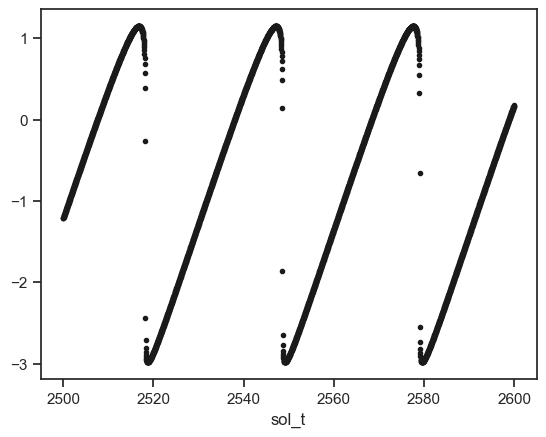

In [10]:
plt.scatter(i417_data['sol_t'][LOWER_LIMIT:UPPER_LIMIT], 
            i417_data['sol_u'][1][LOWER_LIMIT:UPPER_LIMIT],
            marker=".",
            c='k')
plt.xlabel('sol_t')
plt.ylabel('')
plt.show();